So first I just want to get a sanity check over all of the different working parts (model, input space, & associated MSP state)

In [8]:
from epsilon_transformers.process.processes import RRXOR

rrxor = RRXOR()
rrxor_msp = rrxor.derive_mixed_state_presentation(10)

rrxor_msp.path_to_beliefs([0,1,0,1,1,1]) # I want to fix this function so that it's clearer (Add prob of start, & distribution over tokens) Also rename to context_to_msp_state or something like that

array([[0.33333333, 0.33333333, 0.        , 0.16666667, 0.16666667],
       [0.33333333, 0.        , 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.5       , 0.        , 0.5       , 0.        ],
       [0.66666667, 0.        , 0.        , 0.33333333, 0.        ],
       [0.5       , 0.        , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 0.        , 0.5       ]])

Okay, I just want to implement the function which looks at all the different training points and measures how far each training point has moved

/home/lucas/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


<module 'matplotlib.pyplot' from '/home/lucas/.local/lib/python3.10/site-packages/matplotlib/pyplot.py'>

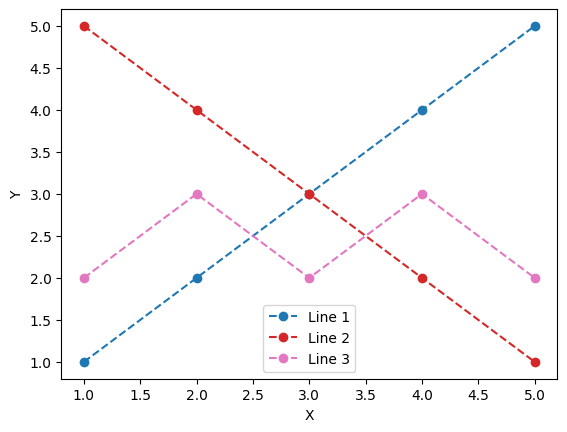

In [1]:
from epsilon_transformers.visualization.line_plot import plot_lineplot


data = {
    'Line 1': [1, 2, 3, 4, 5],
    'Line 2': [5, 4, 3, 2, 1],
    'Line 3': [2, 3, 2, 3, 2]
}

plot_lineplot(data)


/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.0.7) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/home/lucas/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lucas/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-160m into HookedTransformer


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-160m into HookedTransformer


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-160m into HookedTransformer


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-160m into HookedTransformer


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model pythia-160m into HookedTransformer


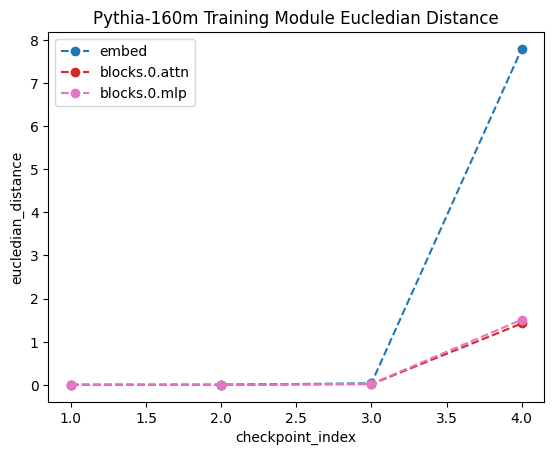

In [1]:
from transformer_lens import HookedTransformer
from epsilon_transformers.analysis.training_analysis import measure_module_distances_across_training
from epsilon_transformers.visualization.line_plot import plot_lineplot

PYTHIA_CHECKPOINTS = [0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512] + list(
    range(1000, 143000 + 1, 1000)
)


transformer_list = [HookedTransformer.from_pretrained('pythia-160m', checkpoint_index=i, device='cpu') for i in PYTHIA_CHECKPOINTS[:5]]
module_list = ['embed', 'blocks.0.attn','blocks.0.mlp']
distance_metric = 'euclidean'

data = measure_module_distances_across_training(transformer_list=transformer_list, module_list=module_list, distance_metric=distance_metric)

plot_lineplot(data, 'checkpoint_index', 'eucledian_distance', 'Pythia-160m Training Module Eucledian Distance').show()


In [4]:
data

{'embed': [0.0,
  0.00032949052996694304,
  0.03530606495511958,
  7.7900992328165435],
 'blocks.0.attn': [0.0,
  0.00014233581684340612,
  0.015318190346937639,
  1.4222892744596367],
 'blocks.0.mlp': [0.0,
  0.0002456246735490588,
  0.02259670821437472,
  1.5085336808543497]}

In [ ]:
# Try test run on pythia models
mock_transformer_list = []
